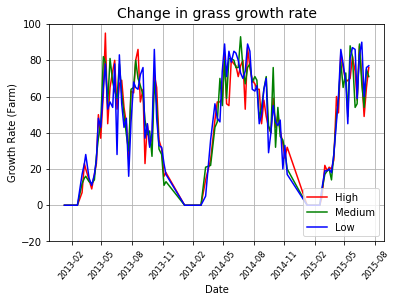

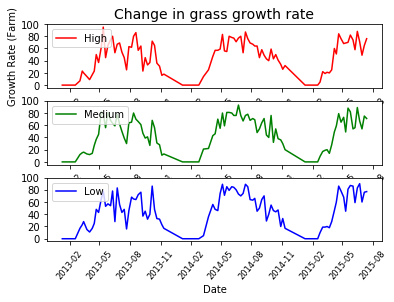

In [2]:
# <Assignment_part_A>
# <Description:  Produce a figure that displays the temporal change in grass growth rate for
# the three treatments (High stocking rate, Medium stocking rate, and Low stocking rate)
# between 10/01/2013 and 13/07/2015. And generate a figure which contains three subplots, 
# one for each of the separate treatments.>

# <2486040Y> <Yang, Jiale> <09/04/2020>
# <Status - test success>

# import modules
import xlrd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as pl
# import matplotlib.dates as mdates
# <Comment: I thought about using this module, but in the end it was not used.>

# read the .xls file using xlrd.open_workbook
# read the first sheet and store it in a temporary table for easy editing
highData = xlrd.open_workbook('F:/1Glasgow/2B_Applied_GIS/python_assignment/AssignmentData2020/PartA/DistGrowth_HighStockingRate.xls')
highTable = highData.sheet_by_index(0)
mediumData = xlrd.open_workbook('F:/1Glasgow/2B_Applied_GIS/python_assignment/AssignmentData2020/PartA/DistGrowth_MediumStockingRate.xls')
mediumTable = mediumData.sheet_by_index(0)
lowData = xlrd.open_workbook('F:/1Glasgow/2B_Applied_GIS/python_assignment/AssignmentData2020/PartA/DistGrowth_LowStockingRate.xls')
lowTable = lowData.sheet_by_index(0)
# <Comment: I also tried to use pandas to extract the needed columns and write them to a new .xls.
# However, the data type in the new file is automatically floating, and I cannot edit the date format.
# So I gave up that method.>

# get the number of data manually
dataNum = 98

# create some empty lists which can store all the data
# dateL stores date value
dateL = [None] * dataNum
# highL stores high grass rate value
highL = [None] * dataNum
# mediumL stores medium grass rate value
mediumL = [None] * dataNum
# lowL stores low grass rate value
lowL = [None] * dataNum

# use for-loop and table.cell, iterate over all data and write into the list
# the start value and column need to be decided manually
for i in range(0, dataNum):
    dateL[i] = highTable.cell_value(i + 13, 1)

# store the data with date format
# %d - day; %m - month; %Y - 4-digit year
dateY = [datetime.strptime(d, '%d/%m/%Y').date() for d in dateL]

# if the table.cell is empty, give it the float value as 0.0
# for the other values, store the value in the list
for a in range(0, dataNum):
    if highTable.cell(a + 13, 5).ctype == 0:
        highL[a] = 0.0
    else:
        highL[a] = highTable.cell_value(a + 13, 5)

for b in range(0, dataNum):
    if mediumTable.cell(b + 11, 5).ctype == 0:
        mediumL[b] = 0.0
    else:
        mediumL[b] = mediumTable.cell_value(b+11,5)

for c in range(0, dataNum):
    if lowTable.cell(c + 11, 5).ctype == 0:
        lowL[c] = 0.0
    else:
        lowL[c] = lowTable.cell_value(c + 11, 5)

#################### plot first figure with three treatments ########################
# use matplotlib.pyplot to plot the values in date and high grass rate (colour: red),
# medium grass rate (colour: green), low grass rate (colour: blue), respectively
pl.plot(dateY, highL, '-r', label = 'High')
pl.plot(dateY, mediumL, '-g', label = 'Medium')
pl.plot(dateY, lowL, '-b', label = 'Low')

# set the title for the plot and set the font size
pl.title('Change in grass growth rate', fontsize = 14)

# set label for x-axis / y-axis
pl.xlabel('Date')
pl.ylabel('Growth Rate (Farm)')

# <Comment: I tried： pl.gca().dateY.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
# to set the date format for x-axis, but I failed.>

# xticks/yticks: text description of setting column
pl.xticks(size = 'small', rotation = 50, fontsize = 9)
pl.yticks(np.arange(-20, 101, 20))

# turn the grid on
pl.grid(True)

# The y ranges displayed on the plot be changed
# pl.ylim (y_low, y_high)
pl.ylim(-20, 100)

# specify the exact legend location (lower right - 4)
pl.legend(loc = 4)

#show the figure
pl.show()


########### plot second figure contains three subplots with separate treatments ###########
pl.figure()

# pl.subplot(rows, columns, location for current subplot)
pl.subplot(3,1,1)
pl.title('Change in grass growth rate', fontsize = 14)
# use matplotlib.pyplot to plot the values in date and high grass rate
pl.plot(dateY, highL, '-r', label = 'High')
# set label for x-axis / y-axis
pl.xlabel('Date')
pl.ylabel('Growth Rate (Farm)')
# set the format for x-axis label value
pl.xticks(size = 'small', rotation = 50, fontsize = 9)
# create a list with values from 0 to 101 with 20 intervals
# the end value is 101, and the labels can include 100
pl.yticks(np.arange(0, 101, 20))
# specify the exact legend location (upper left - 2)
pl.legend(loc = 2)


pl.subplot(3,1,2)
pl.plot(dateY, mediumL, '-g', label = 'Medium')
pl.xticks(size = 'small', rotation = 50, fontsize = 9)
pl.yticks(np.arange(0, 101, 20))
pl.legend(loc = 2)


pl.subplot(3,1,3)
pl.plot(dateY, lowL, '-b', label = 'Low')
pl.xlabel('Date')
pl.xticks(size = 'small', rotation = 50, fontsize = 9)
pl.yticks(np.arange(0, 101, 20))
pl.legend(loc = 2)

# show the plot on screen
pl.show()